# Zadanie (przedziały ufności)

Zmierzono wytrzymałość 10 losowo wybranych gotowych elementów konstrukcji budowlanych i otrzymano następujące wyniki: 

383, 284, 339, 340, 305, 386, 378, 335, 344, 346.

Zakładamy, że rozkład wytrzymałości tych elementów jest rozkładem normalnym $N(\mu,\sigma^2)$ o nieznanych parametrach. Wyznaczyć na podstawie tej próbki 95%-ową realizację przedziału ufności dla nieznanej wartości parametru $\mu$ badanej cechy populacji. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy import integrate

In [2]:
data=np.array([383, 284, 339, 340, 305, 386, 378, 335, 344, 346])
print(data)

[383 284 339 340 305 386 378 335 344 346]


Przedział ufności dla \red{ nieznanej wartości przeciętnej $\mu$} populacji, w której \red{badana cecha ma rozkład $N(\mu,\sigma^2)$}, w przypadku gdy \red{zarówno $\mu$ jak $\sigma$ są nieznane}, na podstawie $n$--elementowej próby $X_1,\ldots,X_n$ \red{(n<100)} wynosi
$$
\left(
\bar X - t \left(1-\frac{\alpha}{2},n-1 \right) \frac{S}{\sqrt{n-1}},
\bar X + t \left(1-\frac{\alpha}{2},n-1 \right) \frac{S}{\sqrt{n-1}}
\right)
$$
gdzie 
$$
S^2 = \frac{1}{n} \sum_{i=1}^{n} (X_{i} - \bar X)
\mbox{ oraz }
\bar X = \frac{1}{n} \sum_{i=1}^{n} X_{i} 
$$
oraz $t(\alpha,n)$ oznacza kwantyl rzędu $\alpha$, który ma $n$ stopni swobody rozkładu $t$--studenta.

## Zdefiniujmy zmienną losową o rozkładzie t-Studenta

In [3]:
n=data.size
X=stats.t(n-1)

## Wylicz końce przedziałów

In [4]:
alpha=0.05
bar_x=np.mean(data)
s=np.std(data,ddof=0)
print(bar_x)
print(s)

344.0
31.1255522039


In [5]:
L=bar_x-X.ppf(1-alpha/2)*(s/np.sqrt(n-1))

In [6]:
R=bar_x+X.ppf(1-alpha/2)*(s/np.sqrt(n-1))

## Wypisz przedział ufności

In [7]:
print(r'( %3.5f , %3.5f)' % (L,R))

( 320.52970 , 367.47030)


# Zadanie 2
Wykonaj zadanie za pomocą <tt>scipy</tt> i <tt>funkcji stats.t.interval</tt>.

In [8]:
ci = stats.t.interval(0.95, n-1, loc=bar_x, scale=stats.sem(data,ddof=1))
ci

(320.52970304586518, 367.47029695413482)

# Zadanie 3
Narysuj przedział ufności na wykresie gęstości i dystrybuanty rozkładu t-Studenta dla statystyki
$$
t = \frac{\bar X - \mu}{S}\sqrt{n-1}
$$

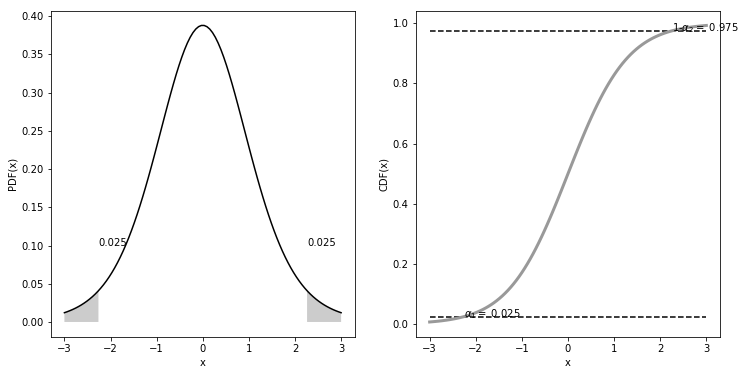

In [9]:
alpha_1=alpha/2
alpha_2=alpha-alpha_1

u_1=X.ppf(alpha_1)
u_2=X.ppf(1-alpha_2)

x = np.linspace(-3,3,100)
yp = X.pdf(x)
y = X.cdf(x)
x1 = np.linspace(-3, u_1)
y1 = X.pdf(x1)

x2 = np.linspace(u_2,3)
y2 = X.pdf(x2)

figs, axs = plt.subplots(1,2, figsize=(12, 6))

axs[0].plot(x,yp, 'k')
axs[0].fill_between(x1, y1, facecolor='#CCCCCC')
axs[0].fill_between(x2, y2, facecolor='#CCCCCC')
axs[0].text(u_1, 0.1, np.round(X.cdf(u_1),4))
axs[0].text(u_2, 0.1, np.round(1-X.cdf(u_2),4))
axs[0].set_xlabel('x')
axs[0].set_ylabel('PDF(x)')

axs[1].plot(x, y, '#999999', lw=3)
axs[1].set_xlabel('x')
axs[1].set_ylabel('CDF(x)')
axs[1].text(u_1, X.cdf(u_1), r'$\alpha_1 = $ %.3f' % np.round(alpha_1,3))
axs[1].hlines(alpha_1, -3, 3, linestyles='--')
axs[1].text(u_2, X.cdf(u_2), r'1-$\alpha_2 = $ %.3f' % np.round(1-alpha_2,3))
axs[1].hlines(1-alpha_2, -3, 3, linestyles='--')
plt.show()